# INTRODUCTION

## Motivation

Pour être accepter dans un programme de master en amérique en tant qu'étudiant étranger, il faut justier de certaines aptitudes académiques et intelectuelles. Les tests comme le GRE et le TOEFL, les lettres de motivation et de recommandation et la moyenne générale comptent énormément dans le processus d'amission. Ce travail analyse brièvement les différents résultats d'étudiants et leurs chance d'avoir une admission dans un master.

## Source et Qualité des données

Les données de cette étude viennent d'[ici](https://www.kaggle.com/datasets/mukeshmanral/graduates-admission-prediction).



# STATISTIQUE DESCRIPTIVE

Commençons par importer les données.

In [19]:
pip install datatable

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install inquirer

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install python-math

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from collections import Counter
from datatable import by
import inquirer
import math
import scipy as sp
from scipy.special import factorial
import scipy.stats
import time
from statistics import median
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import ttest_ind
from scipy.stats import t

In [34]:
df = pd.read_csv(r"C:\Users\hp\Dropbox (Ancien)\PC\Downloads\admission_data.csv")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Statistiques Générales

In [35]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Renommons les variables:

In [36]:
df.columns = df.columns.str.replace(' ', '_')
df.rename(columns = {'LOR_':'LOR', 'Chance_of_Admit_':'Chance_of_Admit'}, inplace = True)
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## Représentations Graphiques

Pour représenter les variables numériques, l'histogramme est tracé avec la courbe de la Fonction de Probabilité de Densité (PDF). Les variables qualitatives seront représentées par un diagramme en bâton et un diagramme en circulaire.

Text(0, 0.5, 'Effectifs')

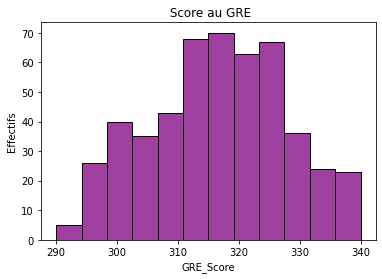

In [37]:
plt.title(" Score au GRE")
sns.histplot(data = df['GRE_Score'], kde = False, color = 'purple')
plt.ylabel('Effectifs')

Text(0, 0.5, 'Effectifs')

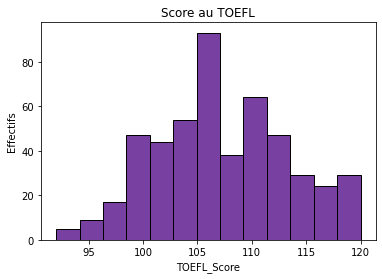

In [38]:
plt.title('Score au TOEFL')
sns.histplot(data = df['TOEFL_Score'], kde = False, color = 'indigo')
plt.ylabel('Effectifs')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

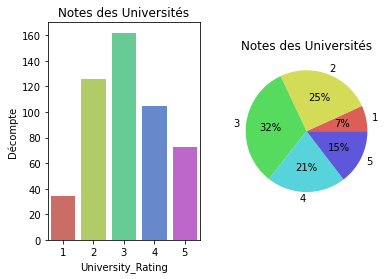

In [39]:
# 1er graph
plt.subplot(1,2,1)
plt.title('Notes des Universités')
sns.countplot(df['University_Rating'], palette  = 'hls')
plt.ylabel('Décompte')

# 2nd graph
plt.subplot(1,2,2)
plt.title('Notes des Universités')
## Compter le nombre d'occurrence par note
frequence = list((df.groupby('University_Rating')).size())
## Définir les labels
noms = [1, 2, 3, 4, 5]
palette_de_couleurs = sns.color_palette('hls')
plt.pie(frequence, labels = noms, colors = palette_de_couleurs, autopct = '%.0f%%')
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


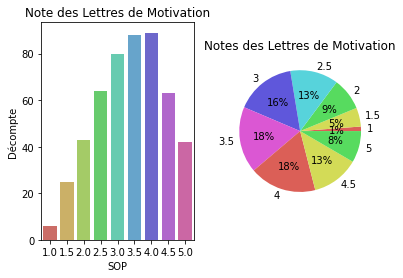

In [40]:
# 1er graph
plt.subplot(1,2,1)
plt.title('Note des Lettres de Motivation')
sns.countplot(df['SOP'], palette  = 'hls')
plt.ylabel('Décompte')

# 2nd graph
plt.subplot(1,2,2)
plt.title('Notes des Lettres de Motivation')
## Compter le nombre d'occurrence par note
frequence = list((df.groupby('SOP')).size())
## Définir les labels
noms = ['1', '1.5', '2', '2.5', '3', '3.5','4','4.5','5']
palette_de_couleurs = sns.color_palette('hls')
plt.pie(frequence, labels = noms, colors = palette_de_couleurs, autopct = '%.0f%%')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


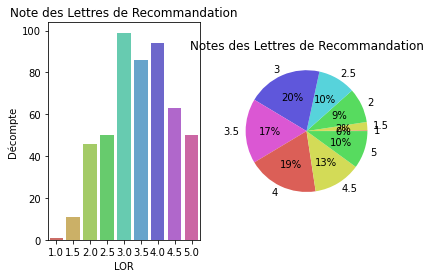

In [41]:
# 1er graph
plt.subplot(1,2,1)
plt.title('Note des Lettres de Recommandation')
sns.countplot(df['LOR'], palette  = 'hls')
plt.ylabel('Décompte')

# 2nd graph
plt.subplot(1,2,2)
plt.title('Notes des Lettres de Recommandation')
## Compter le nombre d'occurrence par note
frequence = list((df.groupby('LOR')).size())
## Définir les labels
noms = ['1', '1.5', '2', '2.5', '3', '3.5','4','4.5','5']
palette_de_couleurs = sns.color_palette('hls')
plt.pie(frequence, labels = noms, colors = palette_de_couleurs, autopct = '%.0f%%')
plt.show()

Text(0, 0.5, 'Effectifs')

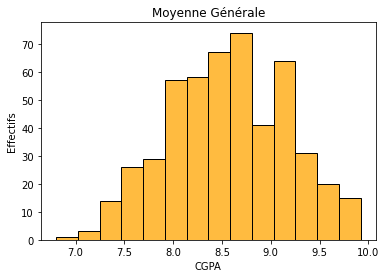

In [42]:
plt.title('Moyenne Générale')
sns.histplot(data = df['CGPA'], kde = False, color = 'orange')
plt.ylabel('Effectifs')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Décompte')

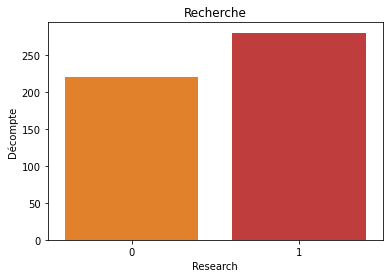

In [43]:
plt.title('Recherche')
sns.countplot(df['Research'], palette = ['tab:orange', 'tab:red'])
plt.ylabel('Décompte')

Text(0, 0.5, 'Densité')

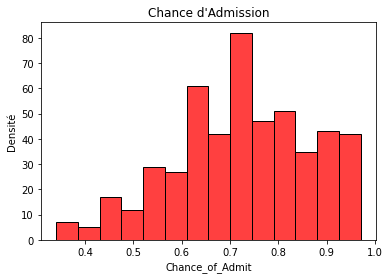

In [44]:
plt.title("Chance d'Admission")
sns.histplot(data = df['Chance_of_Admit'], kde = False, color = 'r')
plt.ylabel('Densité')

## Association des variables 2 par 2

### Corrélogramme

In [ ]:
sns.pairplot(df, kind="scatter")
# Remplacer "scatter" par "reg" pour voir la droite de regression.
plt.show()

### Correlation entre variables

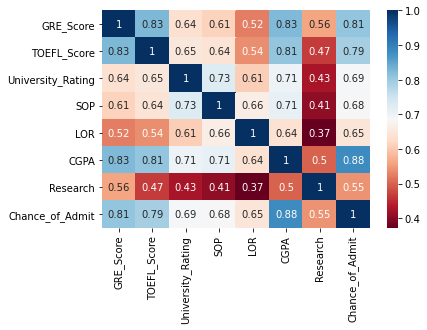

In [45]:
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="RdBu")
plt.show()

### Association à la variable d'interêt (Chance_of_Admit)

<AxesSubplot:xlabel='SOP', ylabel='Chance_of_Admit'>

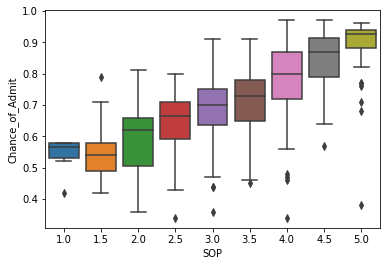

In [46]:
sns.boxplot(data=df, y = df['Chance_of_Admit'], x= df['SOP'], dodge=False)

<AxesSubplot:xlabel='LOR', ylabel='Chance_of_Admit'>

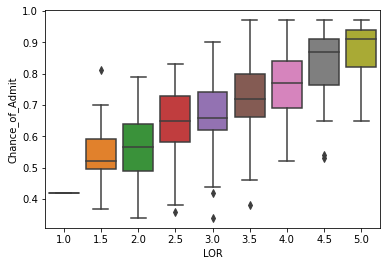

In [47]:
sns.boxplot(data=df, y = df['Chance_of_Admit'], x= df['LOR'], dodge=False)

<AxesSubplot:xlabel='University_Rating', ylabel='Chance_of_Admit'>

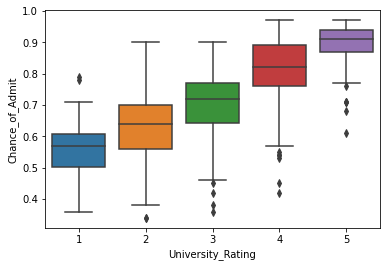

In [48]:
sns.boxplot(data=df, y = df['Chance_of_Admit'], x= df['University_Rating'], dodge=False)

<AxesSubplot:xlabel='Research', ylabel='Chance_of_Admit'>

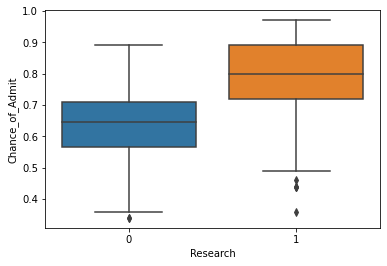

In [49]:
sns.boxplot(data=df, y = df['Chance_of_Admit'], x= df['Research'], dodge=False)

# CALCUL DE PROBABILITES

## Combinaison

Combien de combinaisons sont possibles si on décide de prendre de façon aléatoire 5 étudiants dans la population d'études ?

In [50]:
factoriel = math.factorial
nbr_possible = factoriel(500) / (factoriel(5) * factoriel(500-5))
print ("Il y a ", int(nbr_possible), "possibilités.")

Il y a  255244687600 possibilités.


## Fonction de Masse de Probabilité (PMF)

<AxesSubplot:>

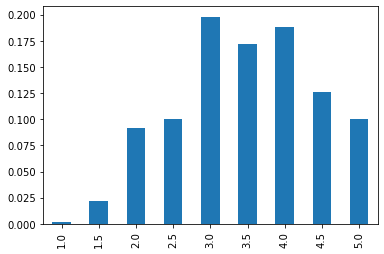

In [51]:
pmf = df["LOR"].value_counts().sort_index() / len(df["LOR"])
pmf.plot(kind='bar')

<AxesSubplot:>

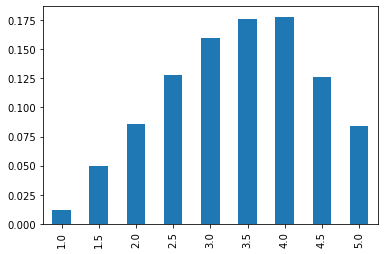

In [52]:
pmf = df["SOP"].value_counts().sort_index() / len(df["SOP"])
pmf.plot(kind='bar')

<AxesSubplot:>

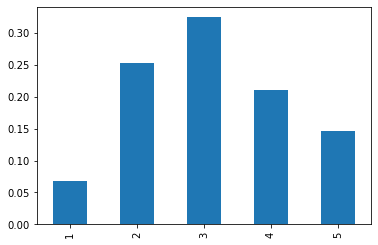

In [53]:
pmf = df["University_Rating"].value_counts().sort_index() / len(df["University_Rating"])
pmf.plot(kind='bar')

## Fonction de Probabilité de Densité

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densité')

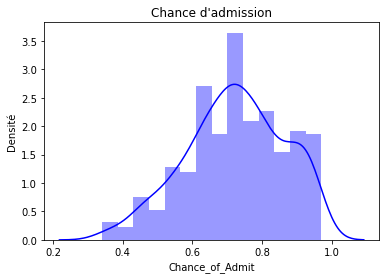

In [54]:
plt.title("Chance d'admission")
sns.distplot(df['Chance_of_Admit'], color='blue')
plt.ylabel('Densité')

### Loi de Probalitité correspondant à la PDF

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


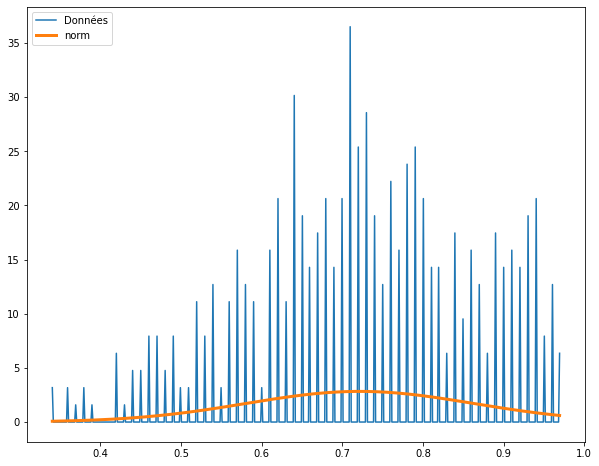

La loi séléctionée est:  norm
Loc. param. :  0.72174
Scale param. :  0.14099919290549148
Autres arguments :  ()
SSE :  12494.626407217507


In [55]:
data = df['Chance_of_Admit']
y, x = np.histogram(data, bins= 500, density=True)

# Milieux des classes:
x = (x + np.roll(x, -1))[:-1] / 2.0

# Les différentes loi de probabilité: 
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']

sse = np.inf
sse_thr = 0.10

for name in dist_names :
    dist = getattr(scipy.stats, name)
    param = dist.fit(data)

    # Paramètres
    loc = param[-2]
    scale = param[-1]
    arg = param[:-2]

    # PDF
    pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
    # SSE
    model_sse = np.sum((y - pdf)**2)
 
    if model_sse < sse :
        best_pdf = pdf
        sse = model_sse
        best_loc = loc
        best_scale = scale
        best_arg = arg
        best_name = name
    if model_sse < sse_thr :
        break

plt.figure(figsize=(10,8))
plt.plot(x, y, label="Données")
plt.plot(x, best_pdf, label=best_name, linewidth=3)
plt.legend(loc='upper left')
plt.show()

# Détails sur la loi sélectionnée
print("La loi séléctionée est: ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Autres arguments : ", best_arg)
print("SSE : ", sse)

La variable `Chance_of_Admit` suit la loi normale.

## Probabilité Conditionnelle

Prenons un example simple :
Quelle est la probabilité que l'un des étudiants aie plus de 75% de chance d'être admis même en n'étant pas très motivé (SOP < 2).

Soit B l'évènement `Chance_of_Admit` > 0.75 .

Soit A l'évènement `SOP` <= 2 .

Nous voulons P(B∣A).
Utilisons le théorème de Bayes.

$P(B∣A) = \frac{P(A∣B)P(B)}{P(A)}$

$P(A∣B) = \frac{P(A∩B)}{P(B)}$

In [56]:
prob_B = len(df[df['Chance_of_Admit'] >= 0.75]) / 500
prob_A = len(df[df['SOP'] <= 2]) / 500

#Probabilité de A inter B
df1 = df[df['Chance_of_Admit'] >= 0.75]
df2 = df1[df1['SOP'] <= 2]
prob_AiB = len(df2) / 500

#Probabilité de A sachant B
prob_AsB = prob_AiB / prob_B

prob_A, prob_B, prob_AiB, prob_AsB

(0.148, 0.436, 0.008, 0.01834862385321101)

On a donc le résultat suivant :

In [57]:
Prob = (prob_AsB * prob_B) / prob_A
print ("On a une probabilité de", Prob*100, "%")

On a une probabilité de 5.405405405405405 %


In [58]:
df2

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
145,320,113,2,2.0,2.5,8.64,1,0.81
146,315,105,3,2.0,2.5,8.48,0,0.75
359,321,107,2,2.0,1.5,8.44,0,0.81
441,332,112,1,1.5,3.0,8.66,1,0.79


## Inégalités de Markov et Tshebyshev

On veut estimer la probabilité qu'un étudiant aie plus de 90% de chances d'être admis.

### Inégalité de Markov

$Prob(X ≥ a) ≤ \frac{E(X)}{a}$

a = 90% (`Chance_of_Admit`)

In [59]:
esp_X = 0.72174
a = 0.9
print ("Prob(X ≥ 90) ≤", esp_X / a)

Prob(X ≥ 90) ≤ 0.8019333333333334


### Inégalité de Tshebyshev

$ P(|X−E(X)| ⩾ a) ⩽ \frac{V(X)}{a^2} $

Ici, a est la valeur absolue de la différence les 90% et l'espérance.

In [60]:
var_X = np.var(df['Chance_of_Admit'])

a = abs(0.9 - esp_X)

y = var_X / (a**2)

print ("Prob(|X−E(X)| ⩾ 0.1782) ⩽", y)

Prob(|X−E(X)| ⩾ 0.1782) ⩽ 0.6256413566051298


## Distribution Bivariée Continue

### Distribution Marginale

Analysons la distribution de probabilité marginale des variables `TOEFL_Score` et `Chance_of_Admit`.

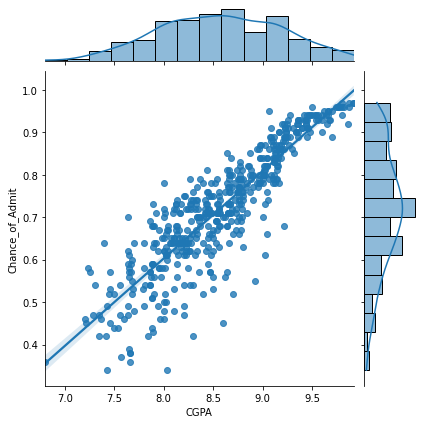

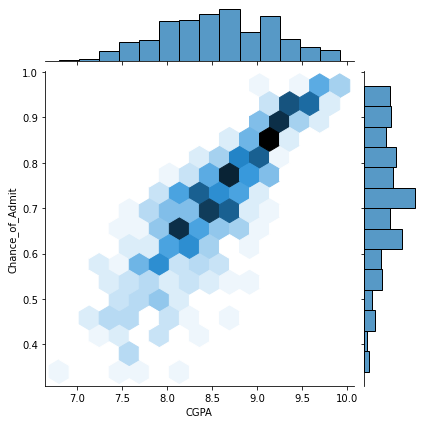

In [61]:
sns.jointplot(data= df , x="CGPA", y="Chance_of_Admit", kind="reg")
sns.jointplot(data= df , x="CGPA", y="Chance_of_Admit", kind="hex")

### Distribution Conditionnelle

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Densité')

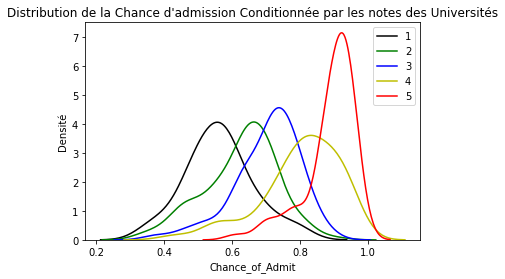

In [62]:
df6 = df[df["University_Rating"] == 1]
df7 = df[df["University_Rating"] == 2]
df8 = df[df["University_Rating"] == 3]
df9 = df[df["University_Rating"] == 4]
df10 = df[df["University_Rating"] == 5]

sns.distplot(df6['Chance_of_Admit'], hist = False, color='k', label = "1")
sns.distplot(df7['Chance_of_Admit'], hist = False, color='g', label = "2")
sns.distplot(df8['Chance_of_Admit'], hist = False, color='b', label = "3")
sns.distplot(df9['Chance_of_Admit'], hist = False, color='y', label = "4")
sns.distplot(df10['Chance_of_Admit'], hist = False, color='r', label = "5")
plt.title("Distribution de la Chance d'admission Conditionnée par les notes des Universités")
plt.legend()
plt.ylabel('Densité')

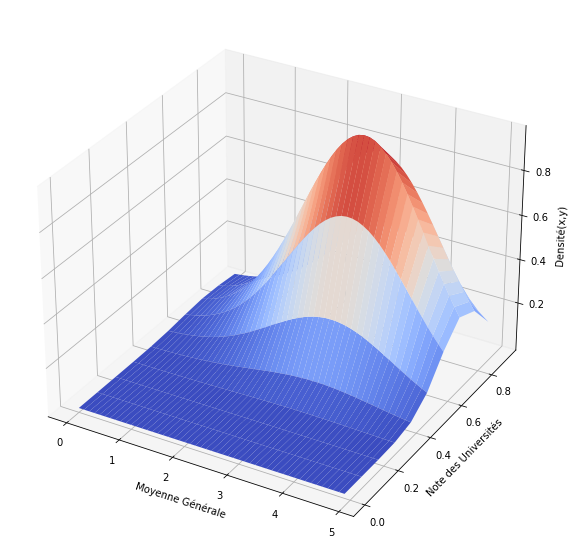

In [63]:
mu_x = np.mean(df['University_Rating'])
variance_x = np.var(df['University_Rating'])

mu_y = np.mean(df['Chance_of_Admit'])
variance_y = np.var(df['Chance_of_Admit'])

x = np.arange(0,5,0.1)
y = np.arange(0,1,0.1)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='coolwarm', linewidth = 2)
ax.set_xlabel('Moyenne Générale')
ax.set_ylabel('Note des Universités')
ax.set_zlabel('Densité(x,y)')
plt.show()

# STATISTIQUE INFERENCIELLE

## Estimation Ponctuelle

In [64]:
taille_echantillon = 50
echantillon = np.random.choice(df['TOEFL_Score'], taille_echantillon)
moyenne = np.mean(df['TOEFL_Score'])
variance = np.var(df['TOEFL_Score'])
mu = np.mean(echantillon)
s = np.var(echantillon)
print('Moyenne de la population = ', moyenne, 'et Variance de la population = ', variance)
print('Une estimation ponctuelle du score obtenu au TOEFL en choisissant une population de', taille_echantillon,  'étudiants donne', mu, '. Nous obtenons une variance de ', s)

Moyenne de la population =  107.192 et Variance de la population =  36.91513599999992
Une estimation ponctuelle du score obtenu au TOEFL en choisissant une population de 50 étudiants donne 107.88 . Nous obtenons une variance de  34.94559999999999


## Interval de Confiance

Trouvons l'interval de confiance à 95% de la moyenne estimée.

In [68]:
interv_conf = scipy.stats.norm.interval(alpha=0.95,
                 loc=np.mean(echantillon),
                 scale=scipy.stats.sem(echantillon))
print(interv_conf)

(104.83050074392304, 108.20949925607695)


## Test d'hypothèses

### Moyenne

In [69]:
echantillon1 = np.random.choice(df['TOEFL_Score'], 75)
echantillon2 = np.random.choice(df['TOEFL_Score'], 200)
t_stat, p = ttest_ind(echantillon1, echantillon2)
print (f't={t_stat}, p={p/2}')

t=-0.5283934309973886, p=0.29882778380172953


# REGRESSION LINEAIRE

# CONCLUSION

# PREDIRE VOTRE CHANCE D'ADMISSION